In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os 

os.chdir('/kaggle/input/hp-supply-chain-optimization')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('train.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import os
import gc
import warnings

# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15454 entries, 0 to 15453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15454 non-null  object 
 1   date             15454 non-null  object 
 2   year_week        15454 non-null  int64  
 3   product_number   15454 non-null  int64  
 4   reporterhq_id    15454 non-null  int64  
 5   prod_category    15454 non-null  object 
 6   specs            15454 non-null  int64  
 7   display_size     15454 non-null  float64
 8   segment          15454 non-null  object 
 9   sales_units      14963 non-null  float64
 10  inventory_units  14961 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.3+ MB


# Data exploration

In [3]:
df = df.dropna()

In [195]:
df["id"].unique().size

7542

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
#define how to aggregate various fields
agg_functions = {"id": "first", "date": "first", "year_week": "first", "product_number": "first", "reporterhq_id": "first", "prod_category": "first", "specs": "first", "display_size": "first", "segment": "first", "sales_units": "sum", "inventory_units": "sum"}

#create new DataFrame by combining rows with same id values
df_new = df.groupby(df['id']).aggregate(agg_functions)

In [6]:
df_new

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
id,,,,,,,,,,,
201915-233919,201915-233919,2019-04-13,201915,233919,3,Clover,106370,15.6,Core,2.0,20.0
201916-233919,201916-233919,2019-04-20,201916,233919,3,Clover,106370,15.6,Core,3.0,43.0
201917-233919,201917-233919,2019-04-27,201917,233919,3,Clover,106370,15.6,Core,122.0,184.0
201918-233919,201918-233919,2019-05-04,201918,233919,3,Clover,106370,15.6,Core,61.0,219.0
201919-233919,201919-233919,2019-05-11,201919,233919,24,Clover,106370,15.6,Core,23.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...
202318-92778,202318-92778,2023-05-06,202318,92778,3,Goku,140215,14.0,Core,21.0,92.0
202318-93765,202318-93765,2023-05-06,202318,93765,3,Arale,155687,14.0,Premium,47.0,31.0
202318-94752,202318-94752,2023-05-06,202318,94752,3,Clover,224344,14.0,Core,11.0,369.0


In [ ]:
# agg_functions1 = {"id": "first", "year_week": "first", "product_number": "first", "reporterhq_id": "first", "prod_category": "first", "specs": "first", "display_size": "first", "segment": "first", "sales_units": "sum", "inventory_units": "sum"}

# #create new DataFrame by combining rows with same id values
# df_new1 = df_new.groupby(df_new['date']).aggregate(agg_functions1)
# newnew

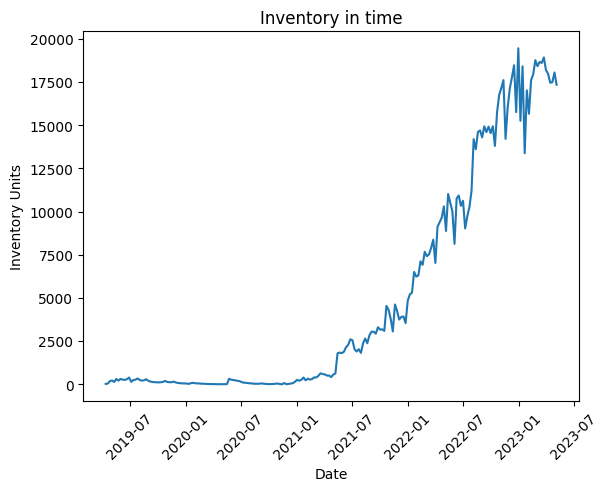

In [200]:
gd = df_new.groupby('date').sum(numeric_only=True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

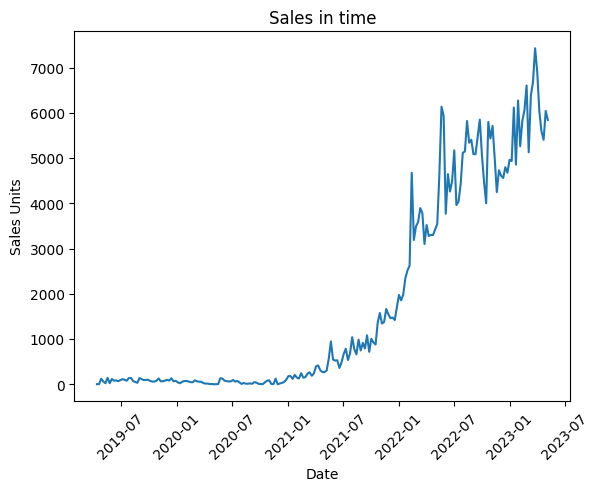

In [201]:
plt.plot(gd.index, gd.sales_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Sales Units')
plt.title('Sales in time')
plt.show()

In [202]:
gd_product_number = df_new.groupby(['date', 'product_number']).sum(numeric_only = True).reset_index()
products = gd_product_number.product_number.unique()
gd_prod_category = df_new.groupby(['date', 'prod_category']).sum(numeric_only = True).reset_index()
prod_categories = gd_prod_category.prod_category.unique()

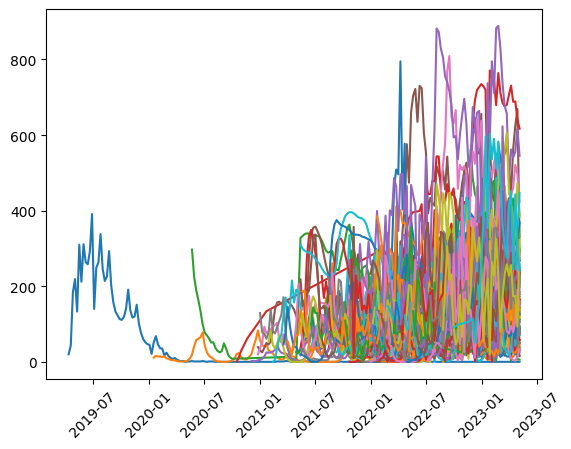

In [203]:
for prod in products: 
    gd_prod = gd_product_number[gd_product_number.product_number == prod]
    plt.plot(gd_prod.date, gd_prod.inventory_units)
    
plt.xticks(rotation = 45)    
plt.show()

In [7]:
df_new.describe()

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,202228.855741,126547.873906,29.270883,110023.623972,15.157704,49.915937,137.733890
std,64.456047,80560.155233,32.437390,63865.270865,1.422126,48.319595,118.812817
min,201915.000000,6909.000000,3.000000,967.000000,11.000000,0.000000,0.000000
25%,202210.000000,51324.000000,3.000000,56086.000000,14.000000,12.000000,55.000000
50%,202232.000000,114492.000000,15.000000,108304.000000,15.600000,37.000000,111.000000
75%,202252.000000,201348.000000,48.000000,155687.000000,15.600000,73.000000,186.000000
max,202318.000000,247737.000000,93.000000,236915.000000,17.300000,335.000000,889.000000


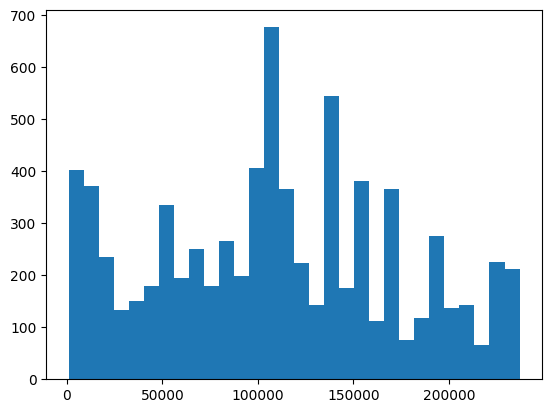

In [205]:
plt.hist(df_new.specs, bins = 30)
plt.show()

In [206]:
# it's interesting to know the correlation among variables
df_new.corr(numeric_only = True)

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
year_week,1.000000,-0.025631,-0.175238,0.110215,0.026316,0.159988,0.246337
product_number,-0.025631,1.000000,0.086757,-0.257812,0.213241,-0.013930,-0.090013
reporterhq_id,-0.175238,0.086757,1.000000,-0.133474,0.047039,-0.225573,-0.080431
specs,0.110215,-0.257812,-0.133474,1.000000,0.109194,-0.016617,-0.000580
display_size,0.026316,0.213241,0.047039,0.109194,1.000000,-0.075140,-0.085585
sales_units,0.159988,-0.013930,-0.225573,-0.016617,-0.075140,1.000000,0.292733
inventory_units,0.246337,-0.090013,-0.080431,-0.000580,-0.085585,0.292733,1.000000


In [207]:
df_new["display_size"].unique()

array([15.6, 17.3, 13.3, 13.5, 16.1, 14. , 11. ])

# Data preparation

In [6]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


In [7]:
df_new["display_size"] = df_new["display_size"].astype(str)
train_df = df_new

In [10]:
train_df

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
id,,,,,,,,,,,
201915-233919,201915-233919,2019-04-13,201915,233919,3,Clover,106370,15.6,Core,2.0,20.0
201916-233919,201916-233919,2019-04-20,201916,233919,3,Clover,106370,15.6,Core,3.0,43.0
201917-233919,201917-233919,2019-04-27,201917,233919,3,Clover,106370,15.6,Core,122.0,184.0
201918-233919,201918-233919,2019-05-04,201918,233919,3,Clover,106370,15.6,Core,61.0,219.0
201919-233919,201919-233919,2019-05-11,201919,233919,24,Clover,106370,15.6,Core,23.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...
202318-92778,202318-92778,2023-05-06,202318,92778,3,Goku,140215,14.0,Core,21.0,92.0
202318-93765,202318-93765,2023-05-06,202318,93765,3,Arale,155687,14.0,Premium,47.0,31.0
202318-94752,202318-94752,2023-05-06,202318,94752,3,Clover,224344,14.0,Core,11.0,369.0


In [8]:
oh_encoder = OneHotEncoder(sparse_output=False)

la_encoder = LabelEncoder()
# oh_encoder.fit_transform(train_df[['product_number', 'reporterhq_id', 'segment', 'prod_category', 'specs']])

dp_encoder = OrdinalEncoder(categories=[train_df["display_size"].unique()])
sg_encoder = OrdinalEncoder(categories=[train_df["segment"].unique()])

# dp_encoder.fit_transform(train_df[["display_size"]])
# sg_encoder.fit_transform(train_df[["segment"]])

col_transform = make_column_transformer(
        (oh_encoder, ['reporterhq_id', 'segment', 'prod_category', 'specs']),
        (dp_encoder, ["display_size"]),
        (sg_encoder, ["segment"])
)
cat_df = col_transform.fit_transform(train_df)

In [37]:
# train_df.drop([""])
# train_df.join()
n = pd.DataFrame(cat_df, dtype=int)
n["id"] = train_df[["id"]].values
n = n.set_index('id')
new_train = train_df.join(n, lsuffix="_train", rsuffix="").drop(["id", "year_week", "reporterhq_id", "prod_category", "specs", "display_size", "segment"], axis=1)
new_train
# new_train['wdate'] = pd.to_datetime(new_train['year_week'],format= '%H:%M:%S' ).dt.isocalendar().week
# first = new_train[new_train["product_number"]==233919].drop("product_number")

,date,product_number,sales_units,inventory_units,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201915-233919,2019-04-13,233919,2.00,20.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201916-233919,2019-04-20,233919,3.00,43.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201917-233919,2019-04-27,233919,122.00,184.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201918-233919,2019-05-04,233919,61.00,219.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201919-233919,2019-05-11,233919,23.00,133.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202318-92778,2023-05-06,92778,21.00,92.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
202318-93765,2023-05-06,93765,47.00,31.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2
202318-94752,2023-05-06,94752,11.00,369.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0


In [22]:
newnew = []
for item in new_train.groupby("date"):
#     newnew = pd.concat((newnew, (pd.concat((pd.Series(item[0]), item[1])))))
    i = item[1].values
    r = [i[0][0]]
#     print(i)
    r.extend([ii[2] for ii in i])
    r.extend([ii[3] for ii in i])

    print(r)
    newnew.append(r)
# print(newnew)
wellno = pd.DataFrame(newnew)
wellno.index = wellno[0]
wellno

,0,date,product_number,sales_units,inventory_units,1,2,3,4,5,...,119,120,121,122,123,124,125,126,127,128
0,2019-04-13 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201915-233919,1.0,2019-04-13,233919.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019-04-20 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201916-233919,1.0,2019-04-20,233919.0,3.0,43.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019-04-27 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202318-92778,1.0,2023-05-06,92778.0,21.0,92.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
202318-93765,1.0,2023-05-06,93765.0,47.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
202318-94752,1.0,2023-05-06,94752.0,11.0,369.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
202318-9870,0.0,2023-05-06,9870.0,10.0,111.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
y = new_train.inventory_units
X = new_train.drop("inventory_units", axis=1)


id
201915-233919    15.6
201916-233919    15.6
201917-233919    15.6
201918-233919    15.6
201919-233919    15.6
                 ... 
202318-92778     14.0
202318-93765     14.0
202318-94752     14.0
202318-9870      15.6
202318-99687     15.6
Name: display_size, Length: 7542, dtype: object

In [231]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7542 entries, 201915-233919 to 202318-99687
Columns: 231 entries, year_week to 228
dtypes: float64(230), int64(1)
memory usage: 13.6+ MB


In [31]:
train = new_train[:int(0.8*(len(new_train)))]
valid = new_train[int(0.8*(len(new_train))):]
X_train = train.drop("inventory_units", axis=1)
y_train = train["inventory_units"]
X_val = valid.drop("inventory_units", axis=1)
y_val = valid["inventory_units"] 

In [235]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AttributeError: 'VARResults' object has no attribute 'y'

In [19]:
lm = LinearRegression()
lm_pp = make_pipeline(col_transform, lm)

In [41]:
lm = LinearRegression()
lm_pipeline = make_pipeline(col_transform, lm)

In [28]:
X_train

,date,product_number,sales_units,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201915-233919,2019-04-13,233919,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201916-233919,2019-04-20,233919,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201917-233919,2019-04-27,233919,122.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201918-233919,2019-05-04,233919,61.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201919-233919,2019-05-11,233919,23.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202303-65142,2023-01-21,65142,41.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2
202303-6909,2023-01-21,6909,19.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
202303-75012,2023-01-21,75012,97.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
y_train

id
201915-233919    20.00
201916-233919    43.00
201917-233919   184.00
201918-233919   219.00
201919-233919   133.00
                 ...  
202303-65142    207.00
202303-6909       6.00
202303-75012     89.00
202303-77973     66.00
202303-7896     197.00
Name: inventory_units, Length: 6033, dtype: float64

In [33]:
X_train.columns = X_train.columns.astype(str) 
X_val.columns = X_val.columns.astype(str) 

lm.fit(X_train, y_train)
lm_pred = lm.predict(X_val)
lm_pred[:10]

array([129.24845755, 178.58345026, 135.42972338, 117.36866605,
       123.29217219, 111.90505117, 110.7699182 , 141.94255823,
        94.93531704, 117.32575369])

In [36]:
# y_pred = lm_model.predict(X_train)
y_true = y_val
print(y_true[:10])

id
202303-80934    89.00
202303-81921   169.00
202303-82908   101.00
202303-83895   151.00
202303-86856    99.00
202303-87843   238.00
202303-89817    62.00
202303-91791    88.00
202303-92778   102.00
202303-93765    40.00
Name: inventory_units, dtype: float64


In [35]:
rms = mean_squared_error(y_true, lm_pred, squared=False)
rms

17153964.217817027

In [ ]:
date_train = 
for product_id in X_train.["product_number"].unique():
    

# Testing

In [ ]:
test_df = pd.read_csv('test.csv')
test_df[['year_week', 'product_number']] = test_df.id.str.split('-', expand = True)
test_df['product_number'] = test_df.product_number.astype(int)
test_df

In [ ]:
product_mapping = train_df[['product_number', 'prod_category', 'segment', 'specs', 'display_size']].drop_duplicates()
product_mapping

In [ ]:
test_df_complete = test_df.merge(product_mapping, on='product_number', how = 'left')
test_df_complete

In [ ]:
X_test = prepare_df(test_df_complete)
y_pred = lm_model.predict(X_test)

In [ ]:
submission = pd.DataFrame({
    'id' : test_df_complete.id,
    'inventory_units' : y_pred
})

submission

In [ ]:
submission.to_csv('/kaggle/working/submission.csv', index = False)